<a href="https://colab.research.google.com/github/hxia5/IDS706/blob/main/exercise_exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crime and Policing Expenditures Exploratory Questions

In this exercise we'll be examining the relationship between crime and policing expenditures using county-level data from Massachusetts. In particular, we're hoping to answer the question "Is there a substantial relationship between crime and policing expenditures?"

## Exercises

### Exercise 1

Begin by downloading the data for this exercise from https://github.com/nickeubank/MIDS_Data/blob/master/descriptive_exercise/crime_expend_MA.csv (just go to `github.com/nickeubank/MIDS_Data`, then go to `descriptive_exercise` and get `crime_expend_MA.csv` if you don't want to type all that).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('crime_expend_MA.csv')
df.head()

,months,county_code,crimeindex,policeexpenditures,month,year
0,0,1,61.411101,32.331110,1,1990
1,0,10,92.779361,59.342067,1,1990
2,0,11,93.222701,50.481508,1,1990
3,0,12,95.588374,65.815540,1,1990
4,0,13,92.472719,38.337757,1,1990


### Exercise 2

This data includes monthly data on both each county's policing expenditures (`policeexpenditures` as share of county budget) and an index of crime (`crimeindex`, scaled 0-100) from 1990 to late 2001.

In these exercises, we'll be focusing on just two counties -- `county_code` 4 and 10.

First, for each of these two counties, calculate the mean expenditure level and mean crimeindex score (i.e. calculate both means separately for each county).

Just to make sure we're practicing applied skills—use a loop to calculate your means and print your results nicely! So you should get output like this (though obviously with different numbers—I'm not gonna give you the answer!):

```
for county 4, average policing expenditure is 23.7 and average crime index is 75.83
for county 10, average policing expenditure is 62.15 and average crime index is 55.88
```

In [ ]:
counties = [4, 10]
avg_policing_exp = []
avg_crime_index = []

for county in counties:
    df_county = df[df['county_code'] == county]
    avg_policing_exp.append(round(df_county['policeexpenditures'].mean(), 2))
    avg_crime_index.append(round(df_county['crimeindex'].mean(), 2))

print("for county", str(counties[0]) + ", average policing expenditure is", avg_policing_exp[0], "and average crime index is", avg_crime_index[0])
print("for county", str(counties[1]) + ", average policing expenditure is", avg_policing_exp[1], "and average crime index is", avg_crime_index[1])

for county 4, average policing expenditure is 54.26 and average crime index is 47.83
for county 10, average policing expenditure is 54.24 and average crime index is 47.77


### Exercise 3

Now calculate the standard deviation of both expenditures and crime for these two counties.

In [ ]:
std_policing_exp_4 = round(df[df['county_code'] == 4]['policeexpenditures'].std(), 2)
std_crime_index_4 = round(df[df['county_code'] == 4]['crimeindex'].std(), 2)
std_policing_exp_10 = round(df[df['county_code'] == 10]['policeexpenditures'].std(), 2)
std_crime_index_10 = round(df[df['county_code'] == 10]['crimeindex'].std(), 2)

print("for county", str(counties[0]) + ", the standard deviation of policing expenditure is", std_policing_exp_4, "and the standard deviation of crime index is", std_crime_index_4)
print("for county", str(counties[1]) + ", the standard deviation of policing expenditure is", std_policing_exp_10, "and the standard deviation of crime index is", std_crime_index_10)

for county 4, the standard deviation of policing expenditure is 16.77 and the standard deviation of crime index is 26.94
for county 10, the standard deviation of policing expenditure is 16.68 and the standard deviation of crime index is 27.0


### Exercise 4

Now calculate the correlation between `policeexpenditures` and `crimeindex` for both of these counties (again, output the correlations with nicely formatted and labelled statements!)

In [ ]:
corr_4 = round(df[df['county_code'] == 4]['policeexpenditures'].corr(df[df['county_code'] == 4]['crimeindex']), 2)
corr_10 = round(df[df['county_code'] == 10]['policeexpenditures'].corr(df[df['county_code'] == 10]['crimeindex']), 2)

print("for county", str(counties[0]) + ", the correlation between policing expenditure and crime index is", corr_4)
print("for county", str(counties[1]) + ", the correlation between policing expenditure and crime index is", corr_10)

for county 4, the correlation between policing expenditure and crime index is -0.06
for county 10, the correlation between policing expenditure and crime index is -0.06


### Exercise 5

Based on your results up to this point, what would you guess about whether policing reduces crime? (I know -- this is just a descriptive statistics, and correlation does not imply causality. But what would you infer if this was all you knew?

The correlations between policing expenditures and crime index, for both counties, are negative 0.06. This means that increasing policing expenditures is associated with a decrease in crime index. Therefore, based on the results so far, we would guess that policing does reduce crime.

### Exercise 6

Given what you've seen up till now, would you infer that county 4 and county 10 have a similar relationship between crime and police expenditures?

County 4 and county 10 have very similar descriptive statistics, from the mean to the standard deviation to the correlation, for both policing expenditures and crime index. Therefore, we would infer that they have a similar relationship between crime and police expenditures.

### Exercise 7

Now plot histograms of `policeexpenditures` for both county 4 and county 10. Do the results change you impression of the similarity of county 4 and county 10?

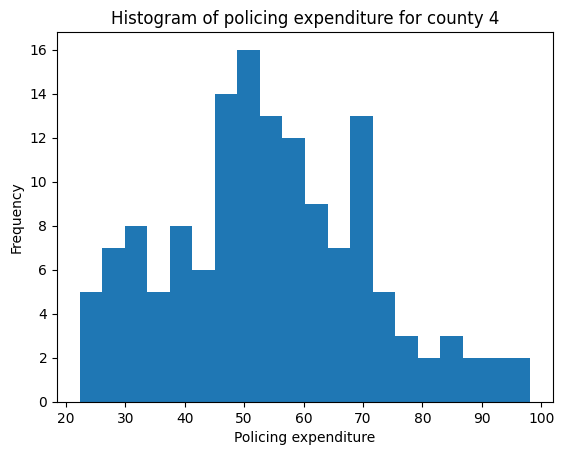

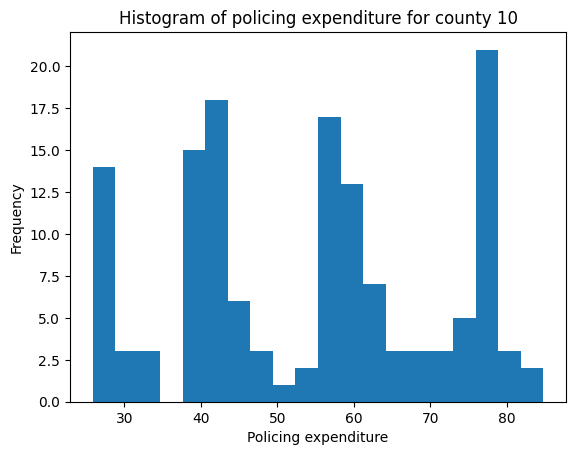

In [ ]:
# Plot the histogram of policing expenditure for county 4
plt.hist(df[df['county_code'] == 4]['policeexpenditures'], bins=20)
plt.title('Histogram of policing expenditure for county 4')
plt.xlabel('Policing expenditure')
plt.ylabel('Frequency')
plt.show()

# Plot the histogram of policing expenditure for county 10
plt.hist(df[df['county_code'] == 10]['policeexpenditures'], bins=20)
plt.title('Histogram of policing expenditure for county 10')
plt.xlabel('Policing expenditure')
plt.ylabel('Frequency')
plt.show()

Based on the histograms, we can see that county 4 and county 10 have very different distributions of policing expenditures. County 4 has its distribution centered around 50 and its overall bell shape indicates that it is somewhat normally distributed. County 10, on the other hand, has its distribution spread out with 4 peaks and is clearly not normally distributed. Therefore, the histograms change our impression of the similarity of county 4 and county 10.

### Exercise 8

Finally, create a scatter plot of the relationship between crime and police expenditures for each county (e.g. crime on one axis, police expenditures on the other). Does this change your sense of how similar these are?

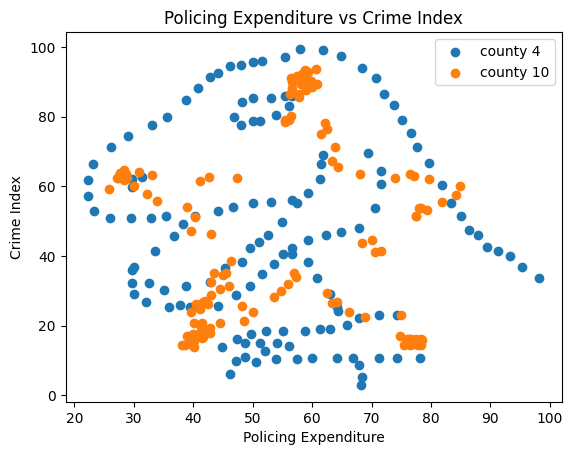

In [ ]:
plt.scatter(df[df['county_code'] == 4]['policeexpenditures'], df[df['county_code'] == 4]['crimeindex'])
plt.scatter(df[df['county_code'] == 10]['policeexpenditures'], df[df['county_code'] == 10]['crimeindex'])
plt.title('Policing Expenditure vs Crime Index')
plt.xlabel('Policing Expenditure')
plt.ylabel('Crime Index')
plt.legend(['county 4', 'county 10'])
plt.show()

Based on the scatter plot, we can see that county 4 and county 10 have very different relationships between policing expenditures and crime index. This again changes our sense of how similar these two counties are.

## After you have answered...

Read this [discussion page](discussion_exploratory.ipynb).
